In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/example/

/content/drive/MyDrive/Colab Notebooks/example


In [3]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import glob
import sys
import os
from PIL import Image 
from typing_extensions import ParamSpecArgs
np.set_printoptions(suppress=True)

In [4]:
# Object points in 3D
GRID_SHAPE = (8,6)
objp = np.zeros((GRID_SHAPE[0]*GRID_SHAPE[1],3), np.float32)
objp[:,:2] = np.mgrid[0:GRID_SHAPE[0], 0:GRID_SHAPE[1]].T.reshape(-1,2)
objp *= 20 # One square on my grid has 20mm

processing 01.png


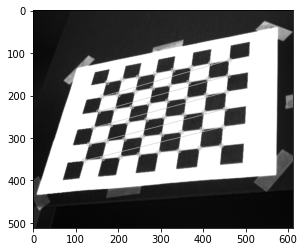

processing 00.png


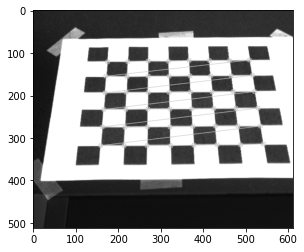

processing 02.png


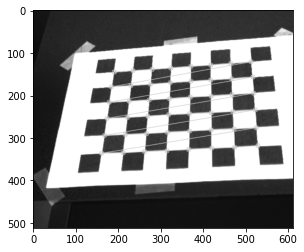

processing 04.png


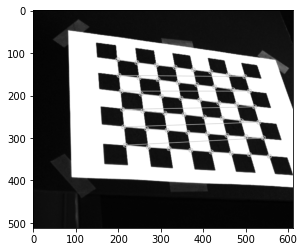

processing 03.png


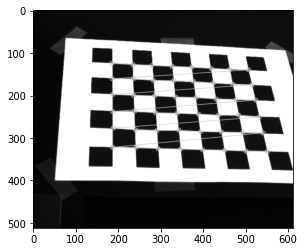

processing 06.png


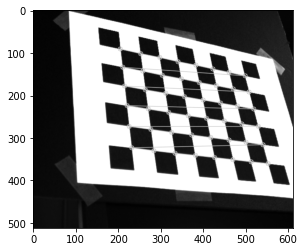

processing 07.png


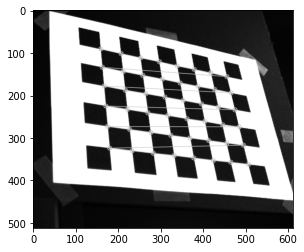

processing 05.png


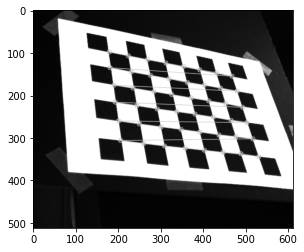

processing 08.png


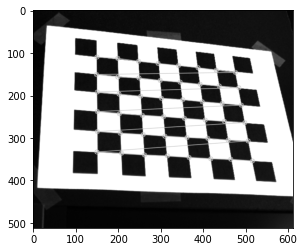

processing 09.png


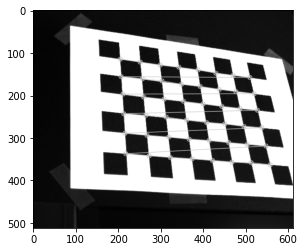

processing 11.png


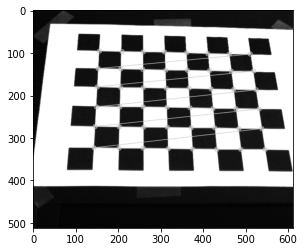

processing 10.png


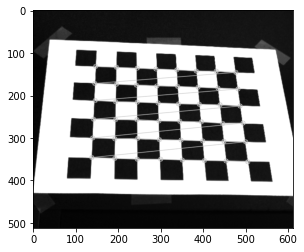

processing 12.png


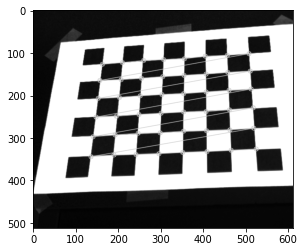

processing 14.png


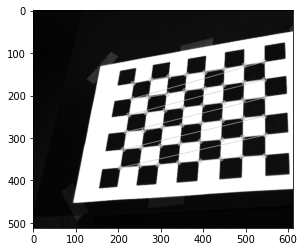

processing 13.png


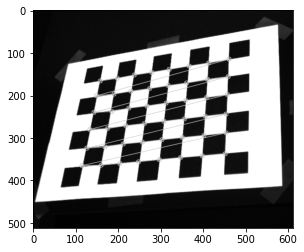

processing 16.png


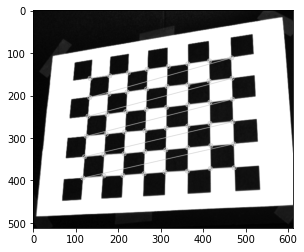

processing 15.png


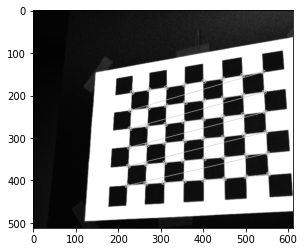

processing 18.png


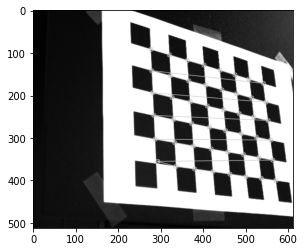

processing 17.png


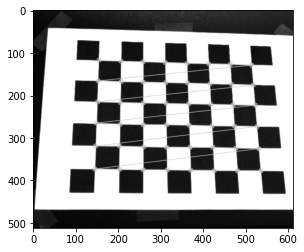

processing 19.png


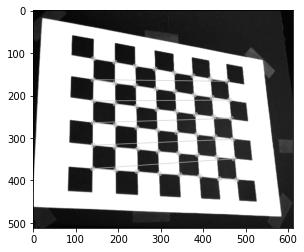

processing 22.png


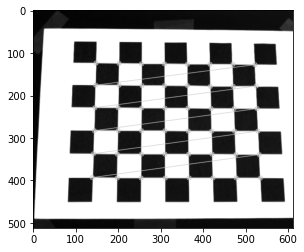

processing 21.png


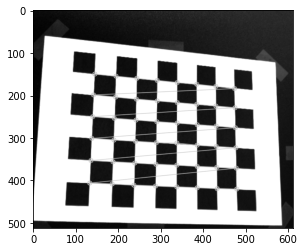

processing 20.png


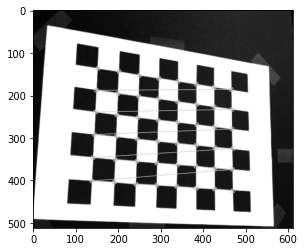

processing 24.png


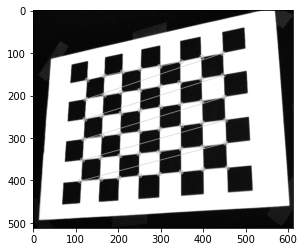

processing 23.png


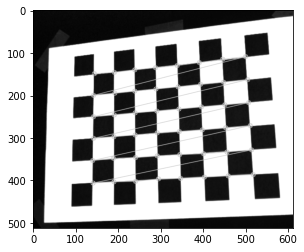

processing 25.png


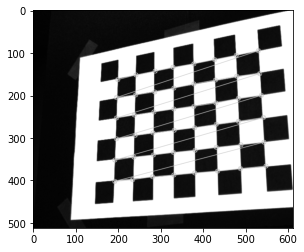

processing 27.png


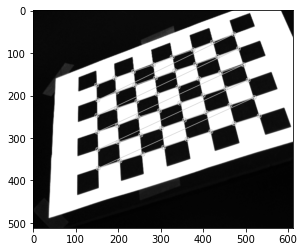

processing 26.png


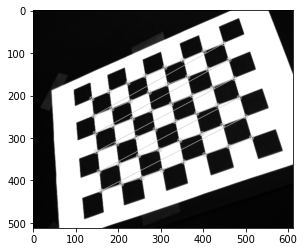

processing 29.png


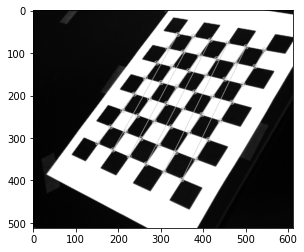

processing 28.png


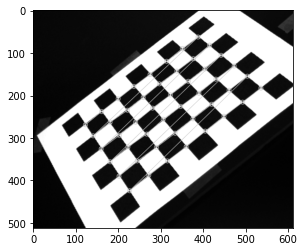

processing 30.png


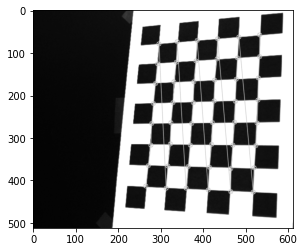

In [6]:
FOLDER = "20230320_stereo_checkerboard/side/diffuse/"
fnames = os.listdir(FOLDER)
obj_pts = []
img_pts = []


for fname in fnames:
    print(f"processing {fname}")
    img = Image.open(FOLDER+fname).convert("L")
    arr = np.array(img)
    
    flags = cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_NORMALIZE_IMAGE + cv2.CALIB_CB_FAST_CHECK
    ret, corners = cv2.findChessboardCorners(arr, GRID_SHAPE, flags)
    
    arr_vis = cv2.drawChessboardCorners(arr, GRID_SHAPE, corners, ret)
    plt.imshow(arr_vis, cmap='gray')
    plt.show()

    if ret:
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
        # criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 25, 0.001)
        corners_subpix = cv2.cornerSubPix(arr,corners,(11,11),(-1,-1),criteria)
        obj_pts.append(objp)
        img_pts.append(corners_subpix)

In [41]:
ret, K_l, dist_coeff_l, rvecs, tvecs = cv2.calibrateCamera(obj_pts, img_pts, (arr.shape[1], arr.shape[0]), None,None)
rvecs

(array([[-0.65589206],
        [-0.02720782],
        [-0.01457257]]), array([[-0.64146039],
        [ 0.41710512],
        [ 0.00692565]]), array([[-0.64990386],
        [ 0.14400428],
        [-0.00547463]]), array([[-0.65043647],
        [-0.36885598],
        [-0.02663736]]), array([[-0.65412913],
        [-0.1787517 ],
        [-0.01968573]]), array([[-0.54924299],
        [-0.52546647],
        [-0.00387932]]), array([[-0.54572085],
        [-0.53266661],
        [-0.00311886]]), array([[-0.64464372],
        [-0.50088298],
        [-0.02892931]]), array([[-0.55864122],
        [-0.14157316],
        [-0.0050732 ]]), array([[-0.55586992],
        [-0.29839824],
        [-0.00634409]]), array([[-0.55193479],
        [-0.38390122],
        [-0.00352181]]), array([[-0.5606831],
        [-0.0961094],
        [-0.0090897]]), array([[-0.55544529],
        [ 0.13493349],
        [-0.00913704]]), array([[-0.54781828],
        [ 0.37941417],
        [-0.00892929]]), array([[-0.34975698],


In [31]:
newcameraMtx, roi = cv2.getOptimalNewCameraMatrix(K_l,dist_coeff_l,(arr.shape[1], arr.shape[0]),1,(arr.shape[1], arr.shape[0]))
newcameraMtx

array([[1143.6953125 ,    0.        ,  333.84559221],
       [   0.        , 1138.96862793,  278.27538384],
       [   0.        ,    0.        ,    1.        ]])

In [ ]:
img = Image.open(FOLDER+"00.png")
arr = np.array(img)

arr_corr = cv2.undistort(arr, K_l, dist_coeff_l, None, K_l)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(arr, cmap='gray')
ax2.imshow(arr_corr, cmap='gray')
plt.show()

In [ ]:
FOLDER = "20230320_stereo_checkerboard/main/diffuse/"
fnames = os.listdir(FOLDER)
obj_pts = []
img_pts = []


for fname in fnames:
    print(f"processing {fname}")
    img = Image.open(FOLDER+fname).convert("L")
    arr = np.array(img)
    
    flags = cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_NORMALIZE_IMAGE + cv2.CALIB_CB_FAST_CHECK
    ret, corners = cv2.findChessboardCorners(arr, GRID_SHAPE, flags)
    
    arr_vis = cv2.drawChessboardCorners(arr, GRID_SHAPE, corners, ret)
    plt.imshow(arr_vis, cmap='gray')
    plt.show()

    if ret:
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
        # criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 25, 0.001)
        corners_subpix = cv2.cornerSubPix(arr,corners,(11,11),(-1,-1),criteria)
        obj_pts.append(objp)
        img_pts.append(corners_subpix)

In [42]:
ret, K_r, dist_coeff_r, rvecs, tvecs = cv2.calibrateCamera(obj_pts, img_pts, (arr.shape[1], arr.shape[0]), None, None)

In [36]:
newcameraMtx, roi = cv2.getOptimalNewCameraMatrix(K_r,dist_coeff_r,(arr.shape[1], arr.shape[0]),1,(arr.shape[1], arr.shape[0]))

In [43]:
rvecs

(array([[-0.65589206],
        [-0.02720782],
        [-0.01457257]]), array([[-0.64146039],
        [ 0.41710512],
        [ 0.00692565]]), array([[-0.64990386],
        [ 0.14400428],
        [-0.00547463]]), array([[-0.65043647],
        [-0.36885598],
        [-0.02663736]]), array([[-0.65412913],
        [-0.1787517 ],
        [-0.01968573]]), array([[-0.54924299],
        [-0.52546647],
        [-0.00387932]]), array([[-0.54572085],
        [-0.53266661],
        [-0.00311886]]), array([[-0.64464372],
        [-0.50088298],
        [-0.02892931]]), array([[-0.55864122],
        [-0.14157316],
        [-0.0050732 ]]), array([[-0.55586992],
        [-0.29839824],
        [-0.00634409]]), array([[-0.55193479],
        [-0.38390122],
        [-0.00352181]]), array([[-0.5606831],
        [-0.0961094],
        [-0.0090897]]), array([[-0.55544529],
        [ 0.13493349],
        [-0.00913704]]), array([[-0.54781828],
        [ 0.37941417],
        [-0.00892929]]), array([[-0.34975698],


In [20]:
rotation_matrix = np.zeros(shape=(3,3))
cv2.Rodrigues(np.array(rvecs)[1], rotation_matrix)
#Apply rotation matrix to point
original_point = np.matrix([[1],[0],[0]])
rotated_point = rotation_matrix*original_point

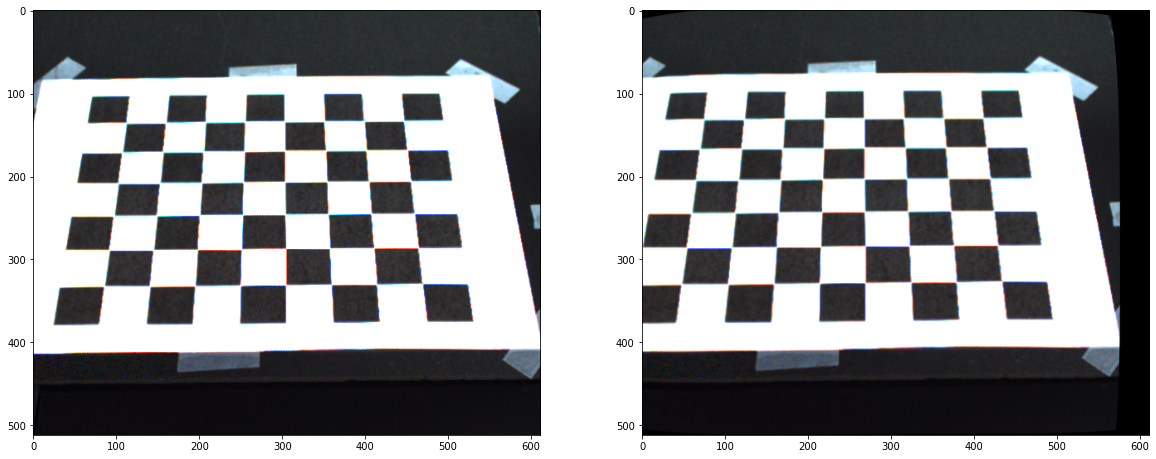

In [39]:
img = Image.open(FOLDER+"00.png")
arr = np.array(img)

arr_corr = cv2.undistort(arr, K_r, dist_coeff_r, None, K_l)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(arr, cmap='gray')
ax2.imshow(arr_corr, cmap='gray')
plt.show()

In [40]:
np.save("K_l.npy", K_l)
np.save("K_r.npy", K_r)

np.save("dist_coeff_l.npy", dist_coeff_l)
np.save("dist_coeff_r.npy", dist_coeff_r)

In [41]:
# Object points in 3D
GRID_SHAPE = (8,6)
objp = np.zeros((GRID_SHAPE[0]*GRID_SHAPE[1],3), np.float32)
objp[:,:2] = np.mgrid[0:GRID_SHAPE[0], 0:GRID_SHAPE[1]].T.reshape(-1,2)
objp *= 20 # One square on my grid has 20mm

In [42]:
folder_right = "20230320_stereo_checkerboard/main/diffuse/"
folder_left = "20230320_stereo_checkerboard/side/diffuse/"
# folder_right = "/content/drive/MyDrive/Colab Notebooks/example/new_calibrated_images_30/main"
# folder_left = "/content/drive/MyDrive/Colab Notebooks/example/new_calibrated_images_30/side"

In [43]:
# Load parameters
(K_l, K_r, dist_l, dist_r) = np.load("K_l.npy"), np.load("K_r.npy"), np.load("dist_coeff_l.npy"), np.load("dist_coeff_r.npy")

In [ ]:
obj_pts = []
img_pts_l, img_pts_r = [], []

for fname_l, fname_r in zip(sorted(os.listdir(folder_left)), sorted(os.listdir(folder_right))):
    print(f"processing {fname_l, fname_r}")
    img_l, img_r = Image.open(folder_left + fname_l).convert("L"), Image.open(folder_right + fname_r).convert("L")
    arr_l, arr_r = np.array(img_l), np.array(img_r)
    gray_l, gray_r  = arr_l, arr_r # the images are already grayscale so no conversion

    flags = cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_NORMALIZE_IMAGE + cv2.CALIB_CB_FAST_CHECK
    ret_l, corners_l = cv2.findChessboardCorners(gray_l, GRID_SHAPE, flags)
    ret_r, corners_r = cv2.findChessboardCorners(gray_r, GRID_SHAPE, flags)

    # if ret_l and ret_r:
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
    # criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 25, 0.001)
    corners_subpix_l = cv2.cornerSubPix(gray_l, corners_l, (11,11), (-1,-1), criteria)
    corners_subpix_r = cv2.cornerSubPix(gray_r, corners_r, (11,11), (-1,-1), criteria)

    obj_pts.append(objp)
    img_pts_l.append(corners_subpix_l)
    img_pts_r.append(corners_subpix_r)

In [ ]:
flags = 0
flags |= cv2.CALIB_FIX_INTRINSIC

criteria_stereo= (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)


# This step is performed to transformation between the two cameras and calculate Essential and Fundamenatl matrix
retS, K_l, dist_l, K_r, dist_r, Rot, Trns, Emat, Fmat = cv2.stereoCalibrate(
    obj_pts,
    img_pts_l,
    img_pts_r,
    K_l, dist_l,
    K_r, dist_r,
    gray_l.shape[::-1],
    criteria_stereo,
    flags)

In [ ]:
rect_l, rect_r, proj_mat_l, proj_mat_r, Q, roiL, roiR = cv2.stereoRectify(K_l, dist_l, K_r, dist_r, gray_l.shape[::-1], Rot, Trns, 1 ,(0,0))

In [ ]:
np.save("Rot.npy", Rot)
np.save("Trns.npy", Trns)

In [ ]:
left_stereo_maps = cv2.initUndistortRectifyMap(K_l, dist_l, rect_l, proj_mat_l,
                                             gray_l.shape[::-1], cv2.CV_16SC2)
right_stereo_maps = cv2.initUndistortRectifyMap(K_r, dist_r, rect_r, proj_mat_r,
                                              gray_l.shape[::-1], cv2.CV_16SC2)

In [ ]:
arr_l_rect = cv2.remap(arr_l, left_stereo_maps[0],left_stereo_maps[1], cv2.INTER_LANCZOS4, cv2.BORDER_CONSTANT, 0)
arr_r_rect = cv2.remap(arr_r, right_stereo_maps[0],right_stereo_maps[1], cv2.INTER_LANCZOS4, cv2.BORDER_CONSTANT, 0)

In [ ]:
# folder_right = "20230317_seokjun/main/diffuse/"
# folder_left = "20230317_seokjun/side/diffuse/"

# folder_left = "20230320_stereo_checkerboard/side/diffuse/"
# folder_right = "20230320_stereo_checkerboard/main/diffuse/"
# folder_right = "20230317_multiple_object/main/polar0/"
# folder_left = "20230317_multiple_object/side/polar0/"
folder_right = "20230317_full_data/main/"
folder_left = "20230317_full_data/side/"
for fname_l, fname_r in zip(sorted(os.listdir(folder_left)), sorted(os.listdir(folder_right))):
    
    print(f"Images L: {fname_l}, R: {fname_r}")

    img_l, img_r = Image.open(folder_left + fname_l), Image.open(folder_right + fname_r)
    arr_l, arr_r = np.array(img_l), np.array(img_r)
    
    arr_l_rect = cv2.remap(arr_l, left_stereo_maps[0],left_stereo_maps[1], cv2.INTER_LANCZOS4, cv2.BORDER_CONSTANT, 0)
    arr_r_rect = cv2.remap(arr_r, right_stereo_maps[0],right_stereo_maps[1], cv2.INTER_LANCZOS4, cv2.BORDER_CONSTANT, 0)
    
    fig, [(ax1, ax2), (ax3, ax4)] = plt.subplots(2, 2, figsize=(10,3))
    
    # before
    ax1.imshow(arr_l[100:200,:], cmap='binary')
    ax2.imshow(arr_r[100:200,:], cmap='binary')
    
    ax1.title.set_text('Original L')
    ax2.title.set_text('Original R')

    
    # after
    ax3.imshow(arr_l_rect[100:200,:], cmap='gray')
    ax4.imshow(arr_r_rect[100:200,:], cmap='gray')
    
    ax3.title.set_text('Rectified L')
    ax4.title.set_text('Rectified R')
    plt.show()

    arr_l_rect=cv2.cvtColor(arr_l_rect, cv2.COLOR_RGB2BGR)
    arr_r_rect=cv2.cvtColor(arr_r_rect, cv2.COLOR_RGB2BGR)
    cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/example/new_calibrated_images_30/side/{0}'.format(fname_l), arr_l_rect)
    cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/example/new_calibrated_images_30/main/{0}'.format(fname_r), arr_r_rect)